In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
b = np.load('Y:\\Philip\\Nat\\01052022_pyes_labeledDNA_DDM_control\\diff_coeffs.npy', allow_pickle = True)
d = dict(enumerate(b.flatten()))

In [45]:
#d[0]['0min']['diffusion_coeffs']
#d[0]['0min']['diffusion_coeff_std']
#d[0]['0min']['diffusion_coeff_eff']
#d[0]['0min']['tau_vs_q_slope']
d

{0: {'0min': {'diffusion_coeffs': array([0.26571684, 0.53727888, 0.3248894 , 0.32918261, 0.48201346,
          0.5264681 , 0.47569761, 0.36832578, 0.47928842, 0.53606719,
          0.36733424, 0.56048917, 0.20841354, 0.40491629, 0.4653392 ,
          0.55124441, 0.49572657, 0.29594705, 0.27877948, 0.49361245,
          0.42628465, 0.41475219, 0.40573218, 0.41705912, 0.44644623,
          0.41255925, 0.49281565, 0.33192574, 0.41598662, 0.48891516,
          0.53105903, 0.53058382, 0.48439549, 0.54416951, 0.71881262,
          0.53279349, 0.68051261, 0.19498872, 0.41014833, 0.46642385,
          0.49873788, 0.65275067, 0.43006145, 0.30069344, 0.42673261,
          0.44893112, 0.52323391, 0.53210042, 0.39018638, 0.57064686,
          0.45432227, 0.54931134, 0.39322886, 0.3736142 , 0.58831599,
          0.40528492, 0.55378183, 0.48431677, 0.41323323, 0.56897027,
          0.18940582, 0.7286144 , 0.37048243, 0.23148433, 0.52157452,
          0.50399063, 0.51572688, 0.46179919, 0.27384394, 0

In [46]:
D_dict = {}
D2_dict = {}
for key in d[0]:
    D_dict[key] = {}
    D2_dict[key] = {}
    for i, slopes in enumerate(d[0][key]['tau_vs_q_slope']):
        if -2.2 < slopes < -1.8:
            if d[0][key]['diffusion_coeff_std'][i] < 0.2:
                D_dict[key][i] = d[0][key]['diffusion_coeffs'][i]
                D2_dict[key][i] = d[0][key]['diffusion_coeff_std'][i]
                
avg_list = []
err_list = []

for i in range(0,241,10):
    key = str(i)+'min'
    #print((key))
    try:
        avg = sum(D_dict[key].values())/len(D_dict[key])
        err = sum(D2_dict[key].values())/len(D2_dict[key])
        #errs = D2_dict[key].values()
        #err = np.sqrt(sum((errs**2)/len(errs**2)))
    except:    
        avg = np.nan
        err = np.nan

    avg_list.append(avg)
    err_list.append(err)
    
print(avg_list)
print(err_list)


[0.4073937065447738, 0.38344555631503613, 0.37748929262516934, 0.33304693748299197, 0.3998836947947829, 0.45647665615700406, 0.30606104646257365, 0.2560337043846861, 0.3040691005464398, 0.39942590484349016, 0.35722541437528577, 0.4228932574718628, 0.47407148776632446, 0.4427010465496015, 0.36250053250712727, 0.497939638591391, 0.47738111373819087, 0.4741745630765294, 0.4826282164942986, 0.39072731672101807, 0.4171332049893264, 0.3261930591731516, 0.46377412640066673, 0.45997440683808904, 0.40801039924418503]
[0.05744462898807188, 0.08185920447098204, 0.07295211456557311, 0.07346263347860434, 0.08632534509154205, 0.0892924590469757, 0.07592807702489061, 0.06960995767238264, 0.06761351571449772, 0.08957206035422194, 0.09352191575410193, 0.08024244100874696, 0.08438276681355686, 0.08060705329632462, 0.0797200617703775, 0.08711865400044809, 0.07340841001263597, 0.0853079373262283, 0.0812601853886925, 0.07337894659027595, 0.07161266839587593, 0.07001916740393856, 0.08496873574379983, 0.0837

<IPython.core.display.Javascript object>


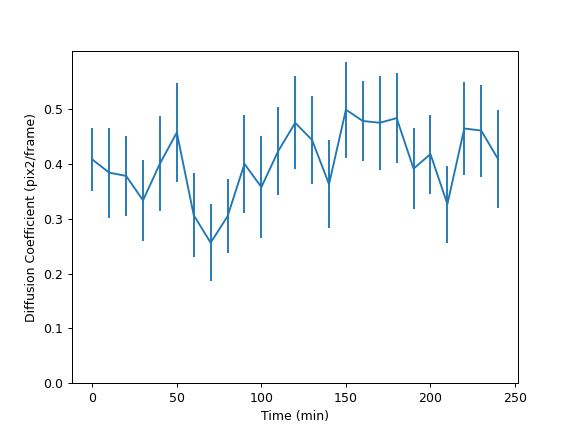

In [47]:
%matplotlib notebook
fig, ax = plt.subplots()
x_list = np.arange(0,241,10)

ax.errorbar(x_list, avg_list, err_list)
#ax.set_yscale('log')
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])
plt.xlabel('Time (min)')
plt.ylabel('Diffusion Coefficient (pix2/frame)')

plt.savefig('Y:\\Philip\\Vedant\\0.3hae_6mgml\\pic.png')

<IPython.core.display.Javascript object>


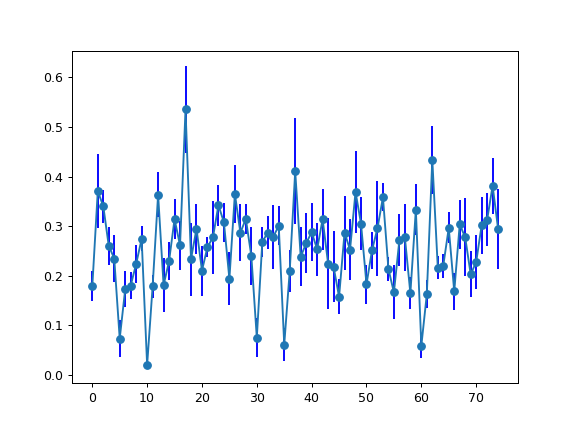

<ErrorbarContainer object of 3 artists>

In [39]:
fig, ax = plt.subplots()

ax.errorbar(np.arange(0,d[0]['130min']['diffusion_coeffs'].shape[0]), d[0]['130min']['diffusion_coeffs'], yerr=d[0]['130min']['diffusion_coeff_std'], fmt='', marker='o', ecolor='blue')